# Fast-forward a previous Experiment from a pickeled Log

## Create and run an experiment

In [1]:
from explauto import Experiment
from explauto.experiment import make_settings

random_goal_babbling = make_settings(environment='simple_arm', environment_config = 'mid_dimensional',
                                     babbling_mode='goal', 
                                     interest_model='discretized_progress',
                                     sensorimotor_model='nearest_neighbor', 
                                     )

expe = Experiment.from_settings(random_goal_babbling)

In [2]:
expe.run(1000)

## Plot some results

Populating the interactive namespace from numpy and matplotlib


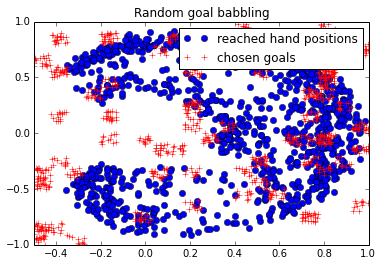

In [3]:
%pylab inline
ax = axes()
title(('Random goal babbling'))

expe.log.scatter_plot(ax, (('sensori', [0, 1]),))
expe.log.scatter_plot(ax, (('choice', [0, 1]),), marker='+', color='red')
#expe.log.scatter_plot(ax, (('testcases', [0, 1]),), marker='o', color='green')

legend(['reached hand positions', 'chosen goals'])

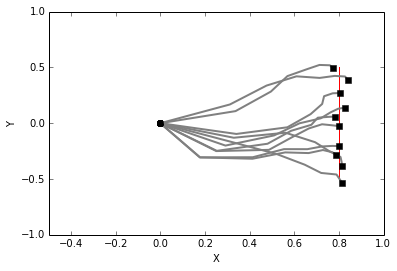

In [4]:
ax = axes()

# Define the line and plot it:
x = 0.8
y_a = 0.5
y_b = -0.5
ax.plot([x, x], [y_a, y_b], color='red')
expe.ag.sensorimotor_model.mode = 'exploit'
# for 10 points equidistantly spaced on the line, perform inverse prediction and plot:
for y in linspace(-0.5, 0.5, 10):
    m = expe.ag.sensorimotor_model.inverse_prediction([x, y])
    expe.env.plot_arm(ax, m)

## Pickle the Experiment Log

In [5]:
expe.log.save('test.pkl', 'pickle')

## Delete the Experiment

In [6]:
del expe

## Load the pickled Log

In [10]:
from explauto.experiment import ExperimentLog
logs = ExperimentLog.from_file('test.pkl', 'pickle')

## Initialize a new Experiment with the same settings

In [11]:
from explauto import Experiment
from explauto.experiment import make_settings

random_goal_babbling = make_settings(environment='simple_arm', environment_config = 'mid_dimensional',
                                     babbling_mode='goal', 
                                     interest_model='discretized_progress',
                                     sensorimotor_model='nearest_neighbor', 
                                     )

expe = Experiment.from_settings(random_goal_babbling)

## Fast-forward it with the pickled Log

In [12]:
expe.fast_forward(logs)

## Plot some results

They should be the same as before pickeling

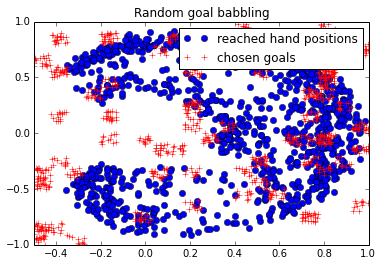

In [13]:
ax = axes()
title(('Random goal babbling'))

expe.log.scatter_plot(ax, (('sensori', [0, 1]),))
expe.log.scatter_plot(ax, (('choice', [0, 1]),), marker='+', color='red')
#expe.log.scatter_plot(ax, (('testcases', [0, 1]),), marker='o', color='green')

legend(['reached hand positions', 'chosen goals'])

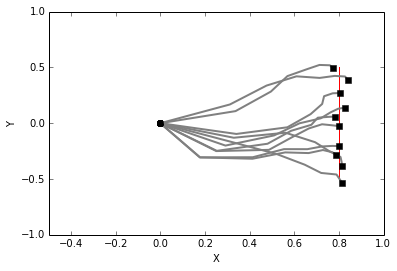

In [14]:
ax = axes()

# Define the line and plot it:
x = 0.8
y_a = 0.5
y_b = -0.5
ax.plot([x, x], [y_a, y_b], color='red')
expe.ag.sensorimotor_model.mode = 'exploit'
# for 10 points equidistantly spaced on the line, perform inverse prediction and plot:
for y in linspace(-0.5, 0.5, 10):
    m = expe.ag.sensorimotor_model.inverse_prediction([x, y])
    expe.env.plot_arm(ax, m)